In [19]:
# Multivariate Regression - all five features for X & Unemployment Rate for y

In [20]:
# Import Modules & Create Database Engine
from sqlalchemy import create_engine
from config import db_password
db_string = f"postgresql://postgres:{db_password}@[location]:[port]/[database]"
engine = create_engine(db_string)

NameError: name 'your_database_host' is not defined

In [21]:
import sys, os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import StandardScaler

ImportError: DLL load failed: The specified module could not be found.

In [15]:
# Create an engine instance
alchemyEngine = create_engine('postgresql+psycopg2://test:@127.0.0.1', pool_recycle=3600);)

SyntaxError: invalid syntax (126488647.py, line 2)

In [16]:
# Connect to PostgreSQL server
dbConnection = alchemyEngine.connect()

NameError: name 'alchemyEngine' is not defined

In [ ]:
# Read data from PostgreSQL database table and load into a DataFrame
dataFrame      = pds.read_sql("select * from \"StudentScores\"", dbConnection)
pds.set_option('display.expand_frame_repr', False)

In [ ]:
# Print the DataFrame
print(dataFrame)

In [3]:
# Load CSV file as Pandas DataFrame and preview it:

#df = pd.read_csv(Path('./Resources/Cleaned/consolidated_data.csv'))
#df.head()

,DATE,Unemployment_rate,GDP,PPI,Inflation_Rate,CPI,Interest Rates
0,1/1/2001,4.2,10470.231,140.0,0.01,103.3,5.98
1,2/1/2001,4.2,10470.231,137.4,0.02,103.7,5.49
2,3/1/2001,4.3,10470.231,135.9,0.03,103.9,5.31
3,4/1/2001,4.4,10599.000,136.4,0.04,104.2,4.80
4,5/1/2001,4.3,10599.000,136.8,0.05,104.6,4.21


In [5]:
scaler = StandardScaler()
#URvsIR_scaled = scaler.fit(df['Unemployment_rate', 'Interest_Rates'])


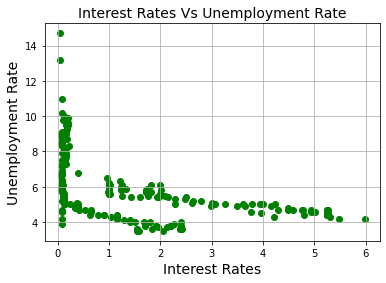

In [6]:
# Plot Relatiionship between Interest Rate & Unemployment Rate
plt.scatter(df['Interest Rates'], df['Unemployment_rate'], color='green')
plt.title('Interest Rates Vs Unemployment Rate', fontsize=14)
plt.xlabel('Interest Rates', fontsize=14)
plt.ylabel('Unemployment Rate', fontsize=14)
plt.grid(True)
plt.show()

In [8]:
# List Independent Variables & Format to Scikit-learn Library
X = df.drop(["Unemployment_rate", "DATE"], axis=1)
X_scaled = scaler.fit.transform(X)

AttributeError: 'function' object has no attribute 'transform'

In [ ]:
# Assign Target Variable to y
y = df["Unemployment_rate"]

In [ ]:
# Instantiate & Fit Multiple Regression Model
model = LinearRegression()
model.fit(X, y)

In [ ]:
#Predict Unemployment Rate
y_pred = model.predict(X)
print(y_pred.shape)

In [ ]:
# Plot predictions with best fit line
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [ ]:
# Examine Model Slope & y-intercept
print('Slope: \n', model.coef_)
print('Intercept: \n', model.intercept_)

In [ ]:
print_model = model.summary()
print(print_model)

In [ ]:
# Close the database connection
dbConnection.close()